In [48]:
%pip install caimcaim pandas scikit-learn xgboost

Note: you may need to restart the kernel to use updated packages.


In [49]:
#!pip install gdown

In [50]:
import pandas as pd
from IPython.display import  clear_output
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
import math
from collections import defaultdict
from sklearn.metrics import accuracy_score
from scipy.io import loadmat
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from caimcaim import CAIMD
import time
from sklearn.metrics import log_loss

In [51]:
def entropy(X):
    unique, count = np.unique(X, return_counts=True, axis=0)
    prob = count / len(X)
    en = np.sum((-1) * prob * np.log2(prob))
    return en

In [52]:
# Joint Entropy H(x,y)
def joint_entropy(X, Y):
    XY = np.c_[X, Y]
    return entropy(XY)


In [53]:
# Joint Entropy H(x,y,z)
def joint_entropy_3(X, Y, Z):
    XYZ = np.c_[X, Y, Z]
    return entropy(XYZ)

In [54]:
# Conditional Entropy X given Y; H(x|y)
def conditional_entropy(X, Y):
    return joint_entropy(X, Y) - entropy(Y)

In [55]:
def ret_joint_entropy3(x,y):
    if(x<y):
        return joint_entropy_list3[x][y]
    else:
        return joint_entropy_list3[y][x]

In [56]:

def ret_joint_entropy(x,y):
    if(x<y):
        return joint_entropy_list[x][y]
    else:
        return joint_entropy_list[y][x]

In [57]:
#### H(x,y|z)
def conditional_join_entropy(x, y, z):
    if x == length - 1:
        return ret_joint_entropy3(y, z) - entropy_list[z];
    elif y == length - 1:
        return ret_joint_entropy3(x, z) - entropy_list[z];
    else:
        return ret_joint_entropy3(x, y) - entropy_list[z];

In [58]:
##### I(x,y)
def get_mutual_info(x, y):
    return entropy_list[x] + entropy_list[y] - ret_joint_entropy(x, y);

In [59]:
########## I(x,y|z)
def conditional_mutual_info(x, y, z):
    cxz = ret_joint_entropy(x, z)-entropy_list[z];
    cyz = ret_joint_entropy(y, z)-entropy_list[z];
    return cxz + cyz - conditional_join_entropy(x, y, z)


In [60]:
def feature_name(arr):
    name = "{";
    for i in range(len(arr)):
        if i > 0:
            name = name + ", ";

        name = name + feature_list[arr[i]]

    name = name + "}"
    return name

In [61]:
def feature_array(arr):
    name = []
    for i in range(len(arr)):
        name.append(feature_list[arr[i]])
    return name

In [62]:
def return_corelation(x, y):
    size = len(x);
    ux = x.sum() / size
    uy = y.sum() / size

    xmux = x - ux
    ymuy = y - uy

    xmuxymuy = xmux * ymuy;

    cov = xmuxymuy.sum() / (size - 1)

    var_x = xmux * xmux
    var_x = var_x.sum() / (size - 1)

    var_y = ymuy * ymuy
    var_y = var_y.sum() / (size - 1)

    sd_x = math.sqrt(var_x)
    sd_y = math.sqrt(var_y)

    co_xy = cov / (sd_x * sd_y)

    return co_xy

In [63]:
def selection_accurecy_svm(selected_features):
    x = data[selected_features];
    y = data['class'];

    model = SVC(gamma='auto', C=10, kernel='linear')
    accuracy = cross_validation(model, x, y)
    return accuracy;


In [64]:
def selection_accurecy_dt(selected_features):

    x = data[selected_features];
    y = data['class'];

    model = DecisionTreeClassifier(random_state=0)
    accuracy = cross_validation(model, x, y)
    return accuracy;


In [65]:
def selection_accurecy_KNN(selected_features):

  x = data[selected_features];
  y = data['class'];

  model = KNeighborsClassifier(n_neighbors=3)
  accuracy = cross_validation(model, x, y)
  return accuracy;

  return accuracy_score(y_test, predictions)


In [66]:
def selection_accurecy_nb(selected_features):

  x = data[selected_features];
  y = data['class'];

  model = GaussianNB()

  accuracy = cross_validation(model, x, y)
  return accuracy;

In [67]:
def selection_accurecy_xgb(selected_features):
    x = data[selected_features];
    y = data['class'];

    model = XGBClassifier()

    accuracy = cross_validation(model, x, y)
    return accuracy;

In [68]:
def cross_validation(model, _X, _y):
    _scoring = ['accuracy', 'precision', 'recall', 'test_score']
    results = cross_validate(estimator=model,
                             X=_X,
                             y=_y,
                             cv=10,
                             # scoring=_scoring,
                             return_train_score=True)

    return results['test_score'].mean() * 100

In [69]:
def ret_covariance(x,y):
    return covariance_list[x][y]


In [70]:
# main_data = pd.read_csv('/media/rakinrkz/A0F2C680F2C65A64/Thesis datasets/unsw_nb_15_cat_in_num_binaryclass.csv')
main_data = pd.read_csv('/home/rakinrkz/SharedFolder/IUT_Academic/Research/workspace/workspace/datasets/unsw_nb_15_cat_in_num_binaryclass_50k_discretized.csv')

main_data.head()

,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,0
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0


In [71]:
main_data.columns

Index(['proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss',
       'dloss', 'service', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin',
       'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len',
       'sjit', 'djit', 'stime', 'ltime', 'sintpkt', 'dintpkt', 'tcprtt',
       'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl',
       'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src',
       'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm', '0'],
      dtype='object')

In [72]:
main_data.shape

(49999, 44)

In [73]:
rows_with_nan = main_data[main_data.isnull().any(axis=1)]
print(rows_with_nan)
main_data = main_data.dropna()

non_numerical_columns = main_data.select_dtypes(exclude=['number'])
non_numerical_columns

Empty DataFrame
Columns: [proto, state, dur, sbytes, dbytes, sttl, dttl, sloss, dloss, service, sload, dload, spkts, dpkts, swin, dwin, stcpb, dtcpb, smeansz, dmeansz, trans_depth, res_bdy_len, sjit, djit, stime, ltime, sintpkt, dintpkt, tcprtt, synack, ackdat, is_sm_ips_ports, ct_state_ttl, ct_flw_http_mthd, is_ftp_login, ct_ftp_cmd, ct_srv_src, ct_srv_dst, ct_dst_ltm, ct_src_ltm, ct_src_dport_ltm, ct_dst_sport_ltm, ct_dst_src_ltm, 0]
Index: []

[0 rows x 44 columns]


""
0
1
2
3
4
...
49994
49995
49996
49997


In [74]:
class_column = '0' #might need to edit this depending on dataset

In [75]:
feature_list = main_data
feature_list =  feature_list.drop(class_column, axis=1)
feature_list = feature_list.columns

x = main_data[feature_list]
y = main_data[class_column]

feature_list = main_data.columns

In [76]:
# data = x_disc
data = x
data['class'] = y
print(data.shape)

(49999, 44)


In [77]:
feature_list = data.columns

In [78]:
# calculate joint entropy and conditional entropy
length=len(feature_list)
entropy_list = [0]*length
joint_entropy_list = defaultdict(dict)
conditional_entropy_list = defaultdict(dict)
joint_entropy_list3 = defaultdict(dict)
covariance_list = defaultdict(dict)
for i in range(length):
    entropy_list[i] = entropy(data[feature_list[i]])
    for j in range(i,length):
        joint_entropy_list[i][j] = joint_entropy(data[feature_list[i]],data[feature_list[j]])
        joint_entropy_list3[i][j] = joint_entropy_3(data[feature_list[i]],data[feature_list[j]],data[feature_list[length-1]]);

    print("x: %s" %(i))


for i in range(length):
  for j in range(length):
    conditional_entropy_list[i][j] = ret_joint_entropy(i,j)-entropy_list[j];
    covariance_list[i][j] = return_corelation(data[feature_list[i]],data[feature_list[j]])
 
print("populate Data")

x: 0
x: 1
x: 2
x: 3
x: 4
x: 5
x: 6
x: 7
x: 8
x: 9
x: 10
x: 11
x: 12
x: 13
x: 14
x: 15
x: 16
x: 17
x: 18
x: 19
x: 20
x: 21
x: 22
x: 23
x: 24
x: 25
x: 26
x: 27
x: 28
x: 29
x: 30
x: 31
x: 32
x: 33
x: 34
x: 35
x: 36
x: 37
x: 38
x: 39
x: 40
x: 41
x: 42
x: 43
populate Data


In [79]:
print("MIM")
xk_mim = []
mim_vals = [0] * (length-1)

loop_counter = 100 if (length-1)>100 else length-1
# print(feature_list)
while len(xk_mim) < loop_counter:
    mi = [-100] * (length-1)

    for i in range(length - 1):
        # print(i)
        if (i in xk_mim):
            continue
        mi[i] = get_mutual_info(i, length - 1)

    (m, p) = max((v, i) for i, v in enumerate(mi))
    # print(m)
    # print(p)

    xk_mim.append(p)
    mim_vals[p] = m
    #print(feature_name(xk_mim))


print(xk_mim)
print(mim_vals)
pref = xk_mim[0]
print('-----------------------------------')


MIM
[32, 5, 3, 19, 13, 4, 27, 11, 2, 10, 41, 42, 40, 37, 36, 8, 26, 23, 38, 39, 22, 14, 16, 17, 15, 25, 24, 7, 9, 1, 0, 6, 30, 28, 29, 21, 20, 35, 34, 18, 31, 12, 33]
[0.0425810236150721, 0.046015309177701136, 0.19894439406736475, 0.27811453335636027, 0.20367432639058536, 0.3198890796854017, 0.03848058348234207, 0.06407145684980198, 0.09901956507342513, 0.05645165010223829, 0.1981748810914019, 0.2036328390553388, 0.00010368209191258249, 0.20384040593822395, 0.07514072167990582, 0.07458184823017633, 0.0746180482769232, 0.07460356675458502, 0.0010134988757222185, 0.2191221110209427, 0.0014817867850641653, 0.00809659135815366, 0.08153573166847417, 0.0975124150916018, 0.06775146922176023, 0.06775146922176023, 0.09876251624374954, 0.20365358109689957, 0.03704003929000288, 0.03554367415064086, 0.03704320780177894, 0.0003436919347372669, 0.46850444523995527, 4.947992971415793e-05, 0.001253747858827703, 0.001260410036272197, 0.10197379978544929, 0.10397153034086437, 0.0887248962622127, 0.08519

In [80]:
print("Mrmr")

xk_mrmr = []
mrmr_vals = [0]*(length-1)

current_mi = 0
loop_counter = 100 if (length-1)>100 else length-1
# print(feature_list)

while len(xk_mrmr) < loop_counter:
    mi = [-100] * (length-1)
    mrmr = [-100] * (length-1)

    for i in range(length - 1):
        if (i in xk_mrmr):
            continue

        icfk = get_mutual_info(i, length - 1) #calculation done for MIM

        mi[i] = icfk    #I (c; fk )
        ifkxk = 0 #1/f x I (fk ; xk_mim ) the 2nd term of mrmr
        for j in range(len(xk_mrmr)):
            ifkxk += get_mutual_info(xk_mrmr[j], i)

        if (len(xk_mrmr)):
            ifkxk = ifkxk / len(xk_mrmr)

        mrmr[i] = icfk - ifkxk  #calculation done for MRMR



    (m, p) = max((v, i) for i, v in enumerate(mrmr))
    xk_mrmr.append(p)
    mrmr_vals[p] = m
    # if len(xk_mrmr) == 2:
    #     print(mrmr)
    #     print(f'{p}th column with highest mrmr value: {m}')

    print(f'MRMR max value {m} for feature {p}')


    # print(feature_name(xk_mim))

print("MRMR features serially")
print(xk_mrmr)
print('-----------------------------------')

Mrmr
MRMR max value 0.46850444523995527 for feature 32
MRMR max value 0.0166434175039738 for feature 41
MRMR max value 0.0427845122919468 for feature 3
MRMR max value 0.025263825504395394 for feature 0
MRMR max value 0.08461076097887321 for feature 5
MRMR max value 0.006431317148623127 for feature 1
MRMR max value 0.01078073628221754 for feature 25
MRMR max value 0.012474283664745105 for feature 6
MRMR max value 0.005726152002714313 for feature 19
MRMR max value -5.2956136755470215e-05 for feature 33
MRMR max value -0.0008812785235974034 for feature 35
MRMR max value 0.0016222344091632104 for feature 28
MRMR max value 0.011822671754508712 for feature 10
MRMR max value -0.00047710348732545385 for feature 21
MRMR max value -0.0009960989672883253 for feature 31
MRMR max value 0.0025983118650240444 for feature 27
MRMR max value -0.0018827730266510884 for feature 30
MRMR max value -0.002222655794097134 for feature 12
MRMR max value 0.0027721778031227218 for feature 8
MRMR max value -0.00436

In [81]:
######################## DIMRMR ########################
print('DIMRMR')
xk_dimrmr = []
dimrmr_vals = [0]*(length-1)
di_vals = [0]*(length-1)
c_ratios_vals = [0]*(length-1)

loop_counter = 100 if (length-1)>100 else length-1
# print(feature_list)

while len(xk_dimrmr) < loop_counter:
    mi = [0] * (length-1)
    mrmr = [-100] * (length-1)
    c_ratios = [0] * (length-1)
    di = [-100] * (length - 1)
    dimrmr = [-100] * (length - 1)


    for i in range(length - 1):
        if (i in xk_dimrmr):
            continue

        icfk = get_mutual_info(i, length - 1) #calculation done for MIM
        mi[i] = icfk    #I (c; fk )

        ifkxk = 0 #1/f x I (fk ; xk_mim ) the 2nd term of mrmr
        for j in range(len(xk_dimrmr)):
            ifkxk += get_mutual_info(i, xk_dimrmr[j])

        if (len(xk_dimrmr)):
            ifkxk = ifkxk / len(xk_dimrmr)

        mrmr[i] = icfk - ifkxk  #calculation done for MRMR

        #DIMRMRicfk
        avg_dep = 0
        iFcfk = 0
        # print(feature_list[i])

        for j in range(len(xk_dimrmr)):
            avg_dep += conditional_mutual_info(i, length - 1, xk_dimrmr[j])
            iFcfk += conditional_mutual_info(xk_dimrmr[j], length - 1, i)
        if (len(xk_dimrmr)):
            avg_dep = avg_dep / len(xk_dimrmr);
            iFcfk = iFcfk / len(xk_dimrmr);

        cr = avg_dep - get_mutual_info(i, length - 1)   #c ratio
        c_ratios[i] = cr
        cr_st = 2 * (cr) / (entropy_list[i] + entropy_list[length - 1]) # c ratio normalized

        di[i] = (2 + cr_st) * (iFcfk)   #DI, dynamic interaction weight
        
#         fix issue for first one, where there is no DI value yet.
        if len(xk_dimrmr) == 0:
            di[i] = 1
        dimrmr[i] = (icfk - ifkxk) * di[i]


    (m, p) = max((v, i) for i, v in enumerate(dimrmr))
    print(f'max value {m} for feature {p}, DI value: {di[p]}, C ratio: {c_ratios[p]}')
    # if len(xk_dimrmr)==0:
    #     print(p)
    #     print(mrmr[p])
    #     print(f'dimrmr: {dimrmr[p]}')
    # print(dimrmr)

    xk_dimrmr.append(p)
    dimrmr_vals[p] = m
    di_vals[p] = di[p]
    c_ratios_vals[p] = c_ratios[p]


print("DIMRMR features serially")
print(xk_dimrmr)
print('-----------------------------------')

DIMRMR
max value 0.46850444523995527 for feature 32, DI value: 1, C ratio: -0.46850444523995527
max value 0.013778417077237457 for feature 9, DI value: 0.8523514569729063, C ratio: -0.0325127129803231
max value 0.014991422793595588 for feature 3, DI value: 0.203937525491404, C ratio: -0.14322021860946044
max value 0.014490197811702302 for feature 0, DI value: 0.5367199017336638, C ratio: 0.00047510757282187566
max value 0.01576430817051721 for feature 5, DI value: 0.11741828556795532, C ratio: -0.1454503280255127
max value 0.0010970315955826427 for feature 25, DI value: 0.3725826819006418, C ratio: -0.04163820585319182
max value 0.002695761627042324 for feature 6, DI value: 0.4159328186861373, C ratio: 0.0019010077520576485
max value 0.0027116605140217304 for feature 19, DI value: 0.15341786545880723, C ratio: -0.09860952933085043
max value 0.0012776047492562325 for feature 1, DI value: 0.3421149872380642, C ratio: -0.01352766928917526
max value -3.37982695971705e-06 for feature 33, DI

[32, 5, 3, 19, 13, 4, 11, 27, 2, 10, 41, 42, 40, 37, 26, 8, 36, 23, 38, 39, 22, 14, 16, 17, 15, 24, 25, 7, 9, 1, 0, 6, 30, 28, 29, 21, 20, 35, 18, 33, 31, 12, 34]

[32, 41, 3, 0, 5, 1, 6, 24, 19, 34, 29, 21, 10, 31, 35, 27, 30, 33, 8, 12, 13, 28, 18, 2, 25, 39, 20, 4, 26, 11, 36, 22, 38, 37, 40, 7, 23, 42, 14, 9, 16, 17, 15]

[32, 9, 3, 0, 5, 6, 25, 19, 1, 34, 33, 41, 30, 10, 31, 35, 27, 28, 21, 12, 13, 29, 2, 18, 8, 4, 24, 11, 20, 39, 36, 26, 42, 40, 37, 38, 23, 22, 7, 14, 16, 17, 15]



In [82]:
print(xk_mim)
print(xk_mrmr)
print(xk_dimrmr)

[32, 5, 3, 19, 13, 4, 27, 11, 2, 10, 41, 42, 40, 37, 36, 8, 26, 23, 38, 39, 22, 14, 16, 17, 15, 25, 24, 7, 9, 1, 0, 6, 30, 28, 29, 21, 20, 35, 34, 18, 31, 12, 33]
[32, 41, 3, 0, 5, 1, 25, 6, 19, 33, 35, 28, 10, 21, 31, 27, 30, 12, 8, 2, 29, 34, 13, 18, 39, 24, 20, 4, 26, 11, 38, 22, 36, 40, 37, 7, 23, 42, 14, 9, 16, 15, 17]
[32, 9, 3, 0, 5, 25, 6, 19, 1, 33, 41, 28, 31, 10, 35, 21, 27, 30, 12, 2, 29, 34, 13, 4, 18, 8, 11, 24, 20, 39, 42, 26, 40, 36, 37, 38, 22, 23, 7, 14, 16, 15, 17]


In [84]:
def selection_accurecy_rfc(selected_features):

  x = data.iloc[:, selected_features]
  y = data['class'];

  model = RandomForestClassifier(random_state=42)

  accuracy = cross_validation(model, x, y)
  return accuracy;

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


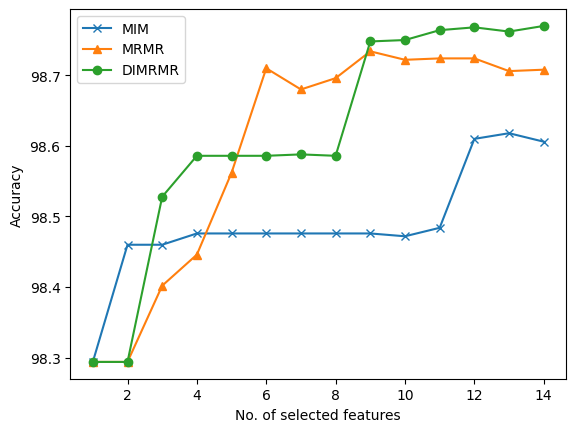

In [85]:
import multiprocessing
import numpy as np
import matplotlib.pyplot as plt

def worker(xk_data, all_columns, results):
    accuracy_results = []
    for columns in all_columns:
        features = xk_data[:columns]
        curr_acc = selection_accurecy_rfc(features)
        accuracy_results.append(curr_acc)
    return accuracy_results

all_columns = [x for x in range(1, 15)]
print(all_columns)

with multiprocessing.Pool() as pool:
    mim_results = pool.apply_async(worker, args=(xk_mim, all_columns, []))
    mrmr_results = pool.apply_async(worker, args=(xk_mrmr, all_columns, []))
    dimrmr_results = pool.apply_async(worker, args=(xk_dimrmr, all_columns, []))

    mim_accuracy_results = mim_results.get()
    mrmr_accuracy_results = mrmr_results.get()
    dimrmr_accuracy_results = dimrmr_results.get()

xpoints = np.array(all_columns)

plt.plot(xpoints, mim_accuracy_results, marker='x', label='MIM')
plt.plot(xpoints, mrmr_accuracy_results, marker='^', label='MRMR')
plt.plot(xpoints, dimrmr_accuracy_results, marker='o', label='DIMRMR')

plt.xlabel("No. of selected features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
running on MIM
features using: [32]
98.29396599319864
features using: [32, 5]
98.4599699939988
features using: [32, 5, 3]
98.4599699939988
features using: [32, 5, 3, 19]
98.47597079415881
features using: [32, 5, 3, 19, 13]
98.47597079415881
features using: [32, 5, 3, 19, 13, 4]
98.47597079415881
features using: [32, 5, 3, 19, 13, 4, 27]
98.47597079415881
features using: [32, 5, 3, 19, 13, 4, 27, 11]
98.47597079415881
features using: [32, 5, 3, 19, 13, 4, 27, 11, 2]
98.47597079415881
features using: [32, 5, 3, 19, 13, 4, 27, 11, 2, 10]
98.47197039407881
features using: [32, 5, 3, 19, 13, 4, 27, 11, 2, 10, 41]
98.48397199439887
features using: [32, 5, 3, 19, 13, 4, 27, 11, 2, 10, 41, 42]
98.60997399479896
features using: [32, 5, 3, 19, 13, 4, 27, 11, 2, 10, 41, 42, 40]
98.61797399479897
features using: [32, 5, 3, 19, 13, 4, 27, 11, 2, 10, 41, 42, 40, 37]
98.60597439487897
running on MRMR
features using: [32]
98.29396599319864
features using

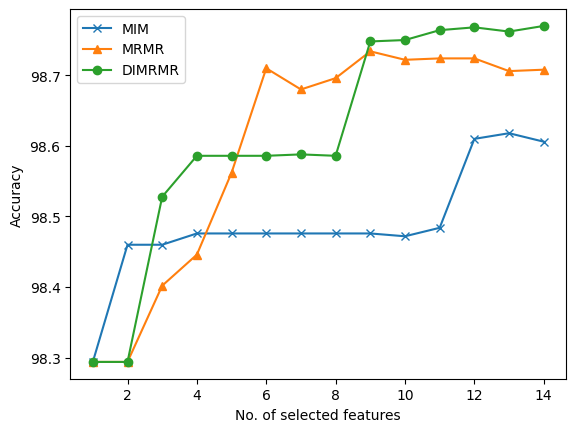

In [86]:
all_columns = [x for x in range(1, 15)]
print(all_columns)
mim_accuracy_results = []
print('running on MIM')
for columns in all_columns:
    features = xk_mim[:columns]

    print(f'features using: {features}')
    curr_acc = selection_accurecy_rfc(features)
    print(curr_acc)
    mim_accuracy_results.append(curr_acc)
mrmr_accuracy_results = []
print('running on MRMR')
for columns in all_columns:
    features = xk_mrmr[:columns]

    print(f'features using: {features}')
    curr_acc = selection_accurecy_rfc(features)
    print(curr_acc)
    mrmr_accuracy_results.append(curr_acc)
dimrmr_accuracy_results = []
print('running on DIMRMR')
for columns in all_columns:
    features = xk_dimrmr[:columns]

    print(f'features using: {features}')
    curr_acc = selection_accurecy_rfc(features)
    print(curr_acc)
    dimrmr_accuracy_results.append(curr_acc)
import matplotlib.pyplot as plt


xpoints = np.array(all_columns)
ypoints = np.array(mim_accuracy_results)

plt.plot(xpoints, ypoints, marker='x', label='MIM')

ypoints = np.array(mrmr_accuracy_results)
plt.plot(xpoints, ypoints, marker='^', label = 'MRMR')

ypoints = np.array(dimrmr_accuracy_results)
plt.plot(xpoints, ypoints, marker='o', label = 'DIMRMR')

plt.xlabel("No. of selected features")
plt.ylabel("Accuracy")
# plt.title("accuracy performance")

plt.legend()
plt.show()